In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('videogames-sales-dataset/XboxOne_GameSales.csv',
                      encoding='latin1', )

df_sales = pd.read_csv('videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv',
                       encoding='latin1')

In [57]:
df.head()


,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [58]:
# LIMPIEZA Xbox

df = df.drop('Pos', axis=1)
# Convierto Action a Action-Adventure en Género
df.Genre = df.Genre.replace('Action', 'Action-Adventure')
df.Publisher = df.Publisher.replace({
    'Sony Interactive Entertainment' :'Sony Interactive', 
    'Sony Computer Entertainment': 'Sony Computer',
    'Warner Bros. Interactive Entertainment': 'Warner Bros'})

# Imputo Unkwown a NA de Publisher y 0 a NA de Year y elimino 2019 y 2020
df.isnull().sum()
df.Publisher = df.Publisher.fillna('Unknown')
df.Year = df.Year.fillna(0)
df.Year = df.Year.astype('int')
df = df[~df['Year'].isin([2019, 2020])]

# Convertir todo a millones (está en decenas de millones)
a_mill = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']
df[a_mill] = df[a_mill] * 10

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,600.0,1652.898333,775.065069,0.0,2014.0,2015.0,2017.0,2018.0
North America,600.0,2.713833,6.000589,0.0,0.0,0.5,2.5,47.0
Europe,600.0,1.353167,3.383559,0.0,0.0,0.1,1.0,32.5
Japan,600.0,0.008500,0.042592,0.0,0.0,0.0,0.0,0.4
Rest of World,600.0,0.408167,0.901112,0.0,0.0,0.1,0.4,7.6
Global,600.0,4.483833,9.916070,0.0,0.0,0.7,3.9,87.2


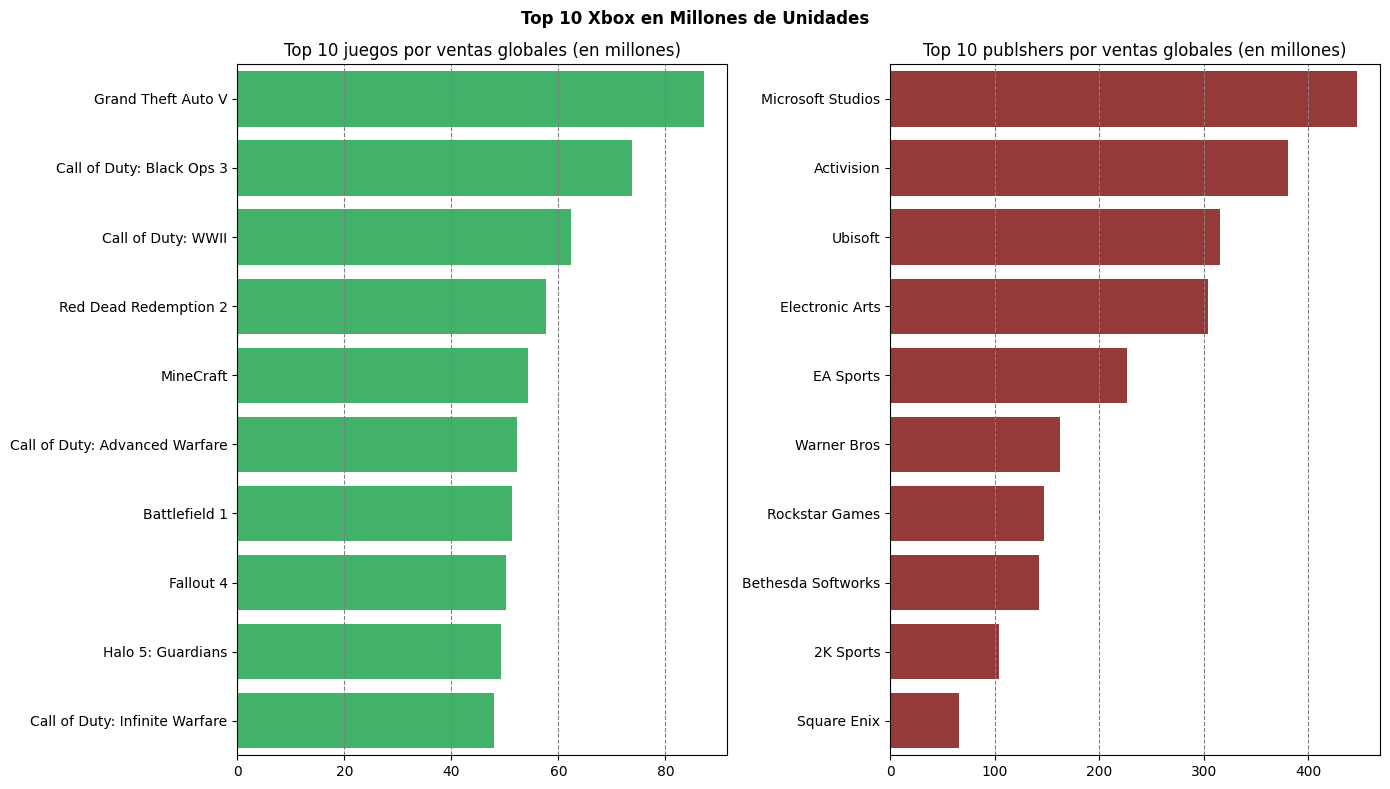

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
fig.suptitle('Top 10 Xbox en Millones de Unidades', fontweight='bold')

# Creo el top10 juego más vendidos
top_10_m = df.sort_values(by='Global', ascending=False)['Game'][:10]

ax[0] = sns.barplot(data=df, x='Global', y=top_10_m, errorbar=None, 
                    color="#2FC463FF", ax=ax[0])
ax[0].set_title('Top 10 juegos por ventas globales (en millones)')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].grid(True, which='major', axis='x', linestyle='--', color='gray')

# Creo el top10 publishers con más ventas
top_10_publishers = df.groupby('Publisher')['Global'].sum().\
    sort_values(ascending=False)[:10].reset_index()

ax[1] = sns.barplot(data=top_10_publishers, x='Global', y='Publisher', 
                    errorbar=None, color='brown', ax=ax[1])
ax[1].set_title('Top 10 publshers por ventas globales (en millones)')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].grid(True, which='major', axis='x', linestyle='--', color='gray')
plt.tight_layout()
plt.show()

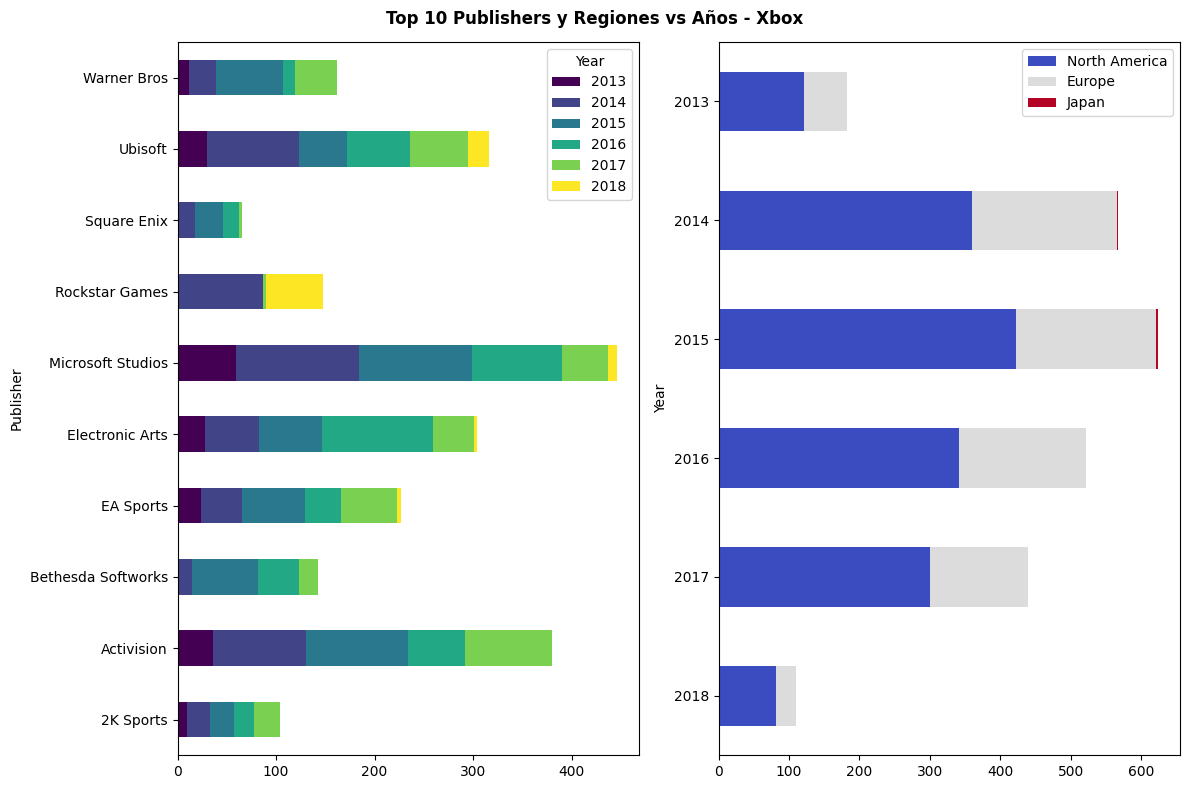

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

fig.suptitle('Top 10 Publishers y Regiones vs Años - Xbox', fontweight='bold')

# DF's para los gráficos
top_10_publishers = df.groupby('Publisher')['Global'].sum()\
    .sort_values(ascending=False)[:10].index
top_10_publishers_an = df.groupby(['Year', 'Publisher'])['Global'].sum()\
    .sort_values(ascending=False).reset_index()
top_10_publishers_an = top_10_publishers_an[top_10_publishers_an['Publisher'] \
    .isin(top_10_publishers)].pivot(index='Publisher', columns='Year', values='Global')

top = df.groupby('Year')[['North America', 'Europe', 'Japan']].sum()
top = top.drop(0, axis=0).sort_index(ascending=False)
# Gráfico 1
top_10_publishers_an.plot(kind='barh', stacked=True,ax=ax[0], cmap='viridis')

# Gráfico 2
top.plot(kind='barh', stacked=True, ax=ax[1], cmap='coolwarm')

plt.tight_layout()
plt.show()